<p style="font-size:120px; text-align:center"><b>Black-Scholes Basics</b></p>
We review the Black-Scholes model with continuous dividends. The results are presented using the Python data science stack.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import ipywidgets as wd
from mpl_toolkits import mplot3d

import sys
sys.path.append("../../")
import pyqfin.models.black_scholes as bs

# Black-Scholes Theory

## Dynamics of the Underlying

**Definition**: The *Black-Scholes model* is defined by a stochastic process
\begin{align}
        dS_t = (r-q) S_t dt + \sigma S_t dW_t, && S_0 = s_0
\end{align}
on a probability space $(\Omega, \mathcal{F}, \mathbb{Q})$, where we think of $\mathbb{Q}$ as the risk-neutral measure with respect to a *bank account numeraire* $B(t)$ defined by
\begin{align*}
    dB_t = r B_t dt, && B_0=1
\end{align*}
Here,
* $s_0$ is the initial value for the stock
* $r \in \mathbb{R}$ is a fixed *risk-free rate*, 
* $\sigma > 0$ is the *volatility*, 
* $W_t$ is a Brownian motion,
* $S_t$ is the evolution of the stock price.


**Lemma (explicit evolution of the underlying):** In the Black-Scholes model, the stock price $S$ and the bank account numeraire $B$ have the explicit solution 
\begin{align}
    S_t & = s_0 \exp(((r-q - \tfrac{1}{2} \sigma^2)t + \sigma W_t) \\
    B_t & = \exp(rt)
\end{align}
\end{Lem}

**Corollary (distributions):** The stock price $S_t$ is log-normally distributed and for any $0 \leq t \leq T$
\begin{align*}
    \mathbb{E}[ S_T \mid \mathcal{F}_t] &= e^{S_t + (r-q)(T-t)}\\
    \mathbb{V}[S_T \mid \mathcal{F}_t] &= (e^{\sigma^2(T-t)}-1) e^{2(S_t + (r-q)(T-t)) + \sigma^2(T-t)}\\
    \operatorname{Cov}[S_t, S_T] &=
\end{align*}

## Pricing of Derivatives

**Theorem (risk-neutral pricing):** Let $V_T$ be an $\mathcal{F}_T$-measurable payoff. Then the arbitrage-free price $V_t$ of $V_T$ at $t$ is given by
\begin{align*}
    V_t = e^{-r(T-t)}\mathbb{E}[V_T \mid \mathcal{F}_t].
\end{align*}

**Definition:** For any *strike* $K$ and *maturity* $T$, the payoffs
\begin{align*}
    C(T) &:= (S_T - K)^+, \\
    P(T) &:= (K-S_T)^+, \\
    F(T) &:= S_T - K
\end{align*}
are called *European call option*, *European put option* and *forward*.

**Theorem**: The price of a European call option $C$, put option $P$ and Forward $F$ with maturity $T$ and strike $K$ is given by
\begin{align*}
    C_t &= e^{-r (T-t)}( f_t \Phi(d_1) - K \Phi(d_2)),\\
    P_t &= e^{-r(T-t)}(K - \Phi(d_2) - f_t \Phi(-d_1)), \\
    F_t &= e^{-q (T-t)}S_0 - e^{-r(T-t)} K, \\
    d_1 &:= \frac{1}{\sigma \sqrt{T-t}} \Big( (r-q+\tfrac{1}{2}\sigma^2)(T-t) + \ln\Big(\frac{S_0}{K}\Big) \Big)\\
    d_2 &:= d_1 - \sigma \sqrt{T-t},\\
    f_t &:= e^{(r-q)(T-t)}S_t
\end{align*}
and the put/call parity 
\begin{align*}
    C_t - P_t = e^{-q (T-t)}S_0 - e^{-r(T-t)} K
\end{align*}
holds. Here $\Phi$ denotes the CDF of the standard normal distribution.



## Greeks

**Theorem(greeks):** The derivatives of $P_t$ and $C_t$ are given by

| Name | Definition | Formula |
| ----------- | ----------- |
| Delta | $\frac{\partial C}{\partial S_0} = e^{-q T} \Phi(d_1)$ |
| Paragraph   | Text        |

	\begin{enumerate}
		\item
			Delta: 
			\begin{align}
				\label{EqBlackScholesDeltaCall}
				\frac{\partial C}{\partial S_0} &= e^{-q T} \Phi(d_1), \\
				\label{EqBlackScholesDeltaPut}
				\frac{\partial P}{\partial S_0} &= e^{-q T} (\Phi(d_1) - 1)
			\end{align}
		\item
			Gamma: 
			\begin{align}
			\label{EqBlackScholesDelta}
				\frac{\partial^2 C}{\partial S_0^2} = e^{-q T} \frac{\varphi(d_1)}{\sigma \sqrt{T}} =
				\frac{\partial^2 P}{\partial S_0^2}
			\end{align}
		\item
			Vega: 
			\begin{align}
				\label{EqBlackScholesVega}
				\frac{\partial C}{\partial \sigma} = e^{-q T} S_0 \varphi(d_1) \sqrt{T} =
				\frac{\partial P}{\partial \sigma}
			\end{align}
		\item
			Theta:
			\begin{align}
				\label{EqBlackScholesThetaCall}
				\frac{\partial C}{\partial t} 
				&= q e^{-q(T-t)}S_0 \Phi(d_1) - r e^{-r(T-t)} K \Phi(d_2) - e^{-q(T-t)}\frac{\sigma S_0 \varphi(d_1)}{2 \sqrt{T-t}}, \\
				\label{EqBlackScholesThetaPut}
				\frac{\partial P}{\partial t}
				&= \frac{\partial C}{\partial t} -qe^{-q(T-t)}S_0 + r e^{-r(T-t)} K
			\end{align}
		\item
			Rho:
			\begin{align}
				\label{EqBlackScholesRhoCall}
				\frac{\partial C}{\partial r}  &= T e^{-r T} K \Phi(d_2) \\
				\label{EqBlackScholesRhoPut}
				\frac{\partial P}{\partial r}  &=-T e^{-r T} K \Phi(-d_2)
			\end{align}
	\end{enumerate}

# Simulation

In [14]:
params = bs.Params(sigma=0.2, r=0.03, q=0.01)

ntimes = 10
time_grid = np.linspace(0, 2, ntimes)
npaths = 100000

bsm = bs.Simulation(params, time_grid, npaths)
bsm.simulate(s0=100)

## Example Paths

<IPython.core.display.Javascript object>


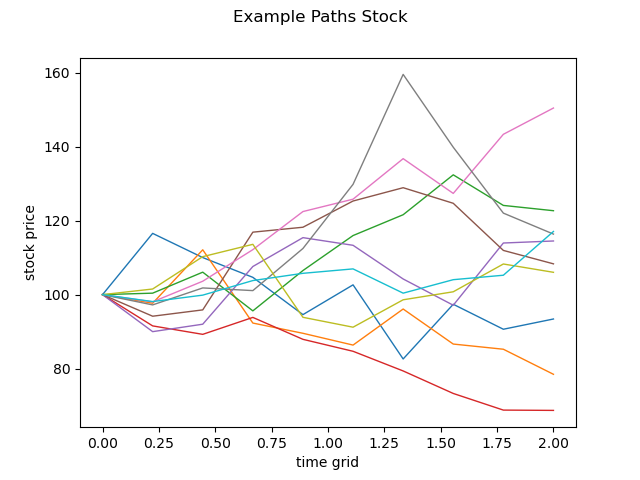

In [15]:
figpath, axpath = plt.subplots()
figpath.suptitle('Example Paths Stock')
axpath.plot(time_grid, bsm.s_[:10, :].T, lw=1)
axpath.set_xlabel('time grid')
axpath.set_ylabel('stock price')
plt.show()

<IPython.core.display.Javascript object>


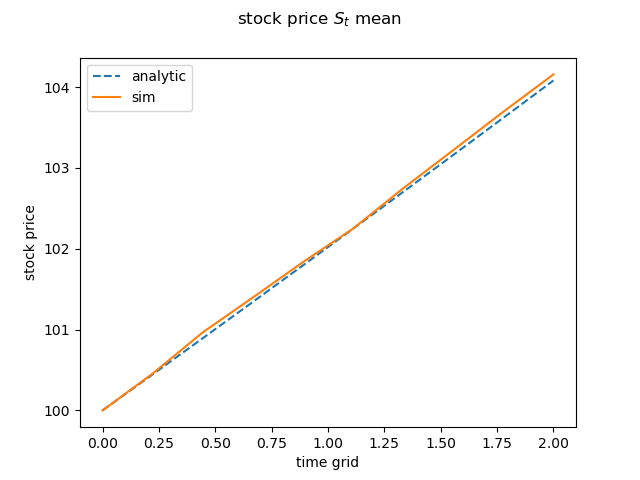

In [19]:
figmean, axmean = plt.subplots()
figmean.suptitle('stock price $S_t$ mean')
axmean.plot(time_grid, bsm.stock_means(), label='analytic', linestyle='--')
axmean.plot(time_grid, bsm.s_.mean(axis=0), label='sim')
axmean.set_xlabel('time grid')
axmean.set_ylabel('stock price')
axmean.legend()
plt.show()

<IPython.core.display.Javascript object>


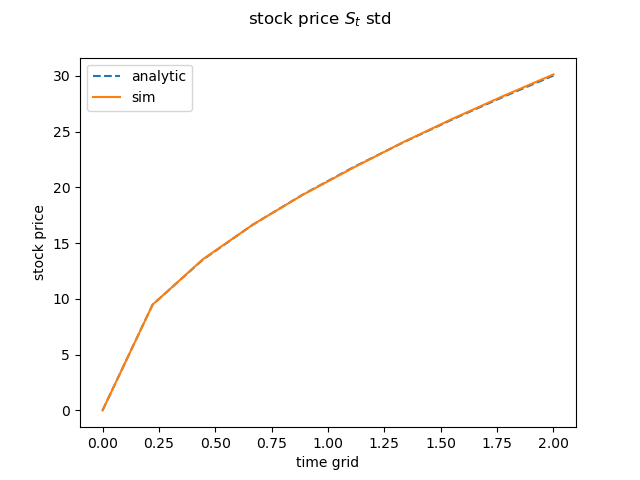

In [20]:
figvar, axvar = plt.subplots()
figvar.suptitle('stock price $S_t$ std')
axvar.plot(time_grid, np.sqrt(bsm.stock_vars()), label='analytic', linestyle='--')
axvar.plot(time_grid, bsm.s_.std(axis=0), label='sim')
axvar.set_xlabel('time grid')
axvar.set_ylabel('stock price')
axvar.legend()
plt.show()